# **Part B**

In [1]:
#import the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# #dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3)

You have learnt about data augmentation in the theoretical assignment, Now you need to use it in the above dataset (You can do it using ImageDataGenerator

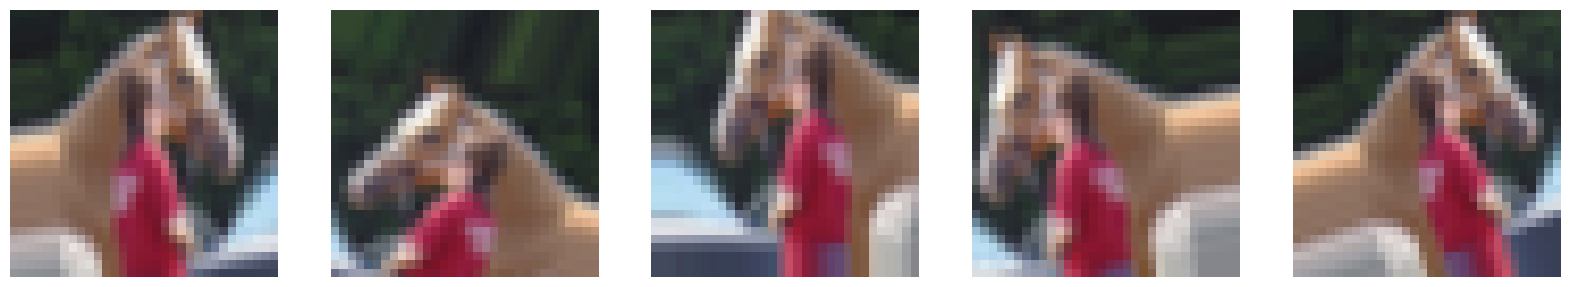

In [6]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

datagen.fit(X_train)

def plot_augmented_images(datagen, X_train):
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    for i in range(5):
        aug_img = datagen.random_transform(X_train[0])
        ax[i].imshow(aug_img.astype('uint8'))
        ax[i].axis('off')
    plt.show()

plot_augmented_images(datagen, X_train)

Use Visualization libraries to see how data augmentation works.

Train a CNN model of your choice and evaluate on the test data using weighted F1 scores ( Do not just try with a single model use multiple models, for example- one with transfer learning or with a different model architecture) at the end compare the performance of the models, and write what do you infer from the same

In [8]:
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

def create_transfer_model(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    base_model.trainable = False
    return model

def train_and_evaluate_model(model, train_gen, val_data, test_data, epochs=5):
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_gen, epochs=epochs, validation_data=val_data)
    y_pred = model.predict(test_data[0])
    y_pred_classes = np.argmax(y_pred, axis=1)
    f1 = f1_score(test_data[1], y_pred_classes, average='weighted')
    return f1

train_gen = datagen.flow(X_train, Y_train, batch_size=32)
val_data = (X_val, Y_val)
test_data = (X_test, Y_test)

cnn_model = create_cnn_model(X_train.shape[1:])
cnn_f1_score = train_and_evaluate_model(cnn_model, train_gen, val_data, test_data)

transfer_model = create_transfer_model(X_train.shape[1:])
transfer_f1_score = train_and_evaluate_model(transfer_model, train_gen, val_data, test_data)

print(f"Simple CNN model F1 score: {cnn_f1_score}")
print(f"Transfer learning model F1 score: {transfer_f1_score}")

if cnn_f1_score > transfer_f1_score:
    print("The simple CNN model performed better.")
else:
    print("The transfer learning model with VGG16 performed better.")

313/313 [==============================] - 125s 398ms/step
Simple CNN model F1 score: 0.4211558280735054
Transfer learning model F1 score: 0.4328866400673217
The transfer learning model with VGG16 performed better.
